In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

employees = pd.read_csv("2017_jun_final.csv")
employees.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [ ]:
employees.shape

(8704, 25)

In [ ]:
employees.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [36]:
# Частка пропусків у кожній колонці
missing_fraction = employees.isnull().sum() / len(employees)
missing_fraction


N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Спеціалізація                       0.829389
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Університет                         0.041131
Ще студент                          0.000000
Рівень англійської                  0.000000
Предметна область                   0.025620
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [ ]:
# Видалення всіх стовпців з пропусками, крім "Мова програмування"
columns_to_keep = ["Мова програмування"]
employees_cleaned = employees[columns_to_keep].copy()  # Залишаємо тільки цей стовпець

missing_fraction = employees_cleaned.isnull().sum() / len(employees_cleaned)
print("Частка пропусків у кожній колонці:")
print(missing_fraction)


Частка пропусків у кожній колонці:
Мова програмування    0.442325
dtype: float64


In [ ]:
# Видалення всіх рядків, де в "Мова програмування" є пропуски
employees_cleaned = employees_cleaned.dropna(subset=["Мова програмування"])

print("Розмір таблиці після видалення пропусків:")
print(employees_cleaned.shape)



Розмір таблиці після видалення пропусків:
(4854, 1)


In [ ]:
# Фільтрація даних для Python-програмістів
python_data = employees[employees["Мова програмування"].str.contains("Python", na=False)]

print("Розмір таблиці python_data:")
print(python_data.shape)


Розмір таблиці python_data:
(207, 25)


In [ ]:
grouped_data = python_data.groupby("Посада")
print("Групування за посадою:")
print(grouped_data.size())


Групування за посадою:
Посада
Junior Software Engineer     63
Senior Software Engineer     31
Software Engineer           100
System Architect              2
Technical Lead               11
dtype: int64


In [ ]:
aggregated_data = employees.groupby("Посада").agg(
    min_salary=("Зарплата на місяць", "min"),
    max_salary=("Зарплата на місяць", "max")
)

# агрегація мін макс
print("Агрегація мінімальної та максимальної зарплати за посадою:")
print(aggregated_data)

Агрегація мінімальної та максимальної зарплати за посадою:
                                            min_salary  max_salary
Посада                                                            
Business analyst                                   200        5000
DBA                                                380        6000
Data Scientist / Data Analyst                      150        8000
Designer                                           100        4000
DevOps                                             194       10000
Director of Engineering / Program Director        1500       34000
ERP / CRM                                          100        6000
Game designer                                      150        6800
HR                                                 100        7000
HTML coder                                         154        3000
Junior QA engineer                                  96        2000
Junior Software Engineer                            75        2600
Mar

In [ ]:
# середнє значення зарплати
def fill_avg_salary(row):
    return (row["min_salary"] + row["max_salary"]) / 2

aggregated_data["avg"] = aggregated_data.apply(fill_avg_salary, axis=1)
print("Таблиця з доданим середнім значенням зарплати:")
print(aggregated_data)


Таблиця з доданим середнім значенням зарплати:
                                            min_salary  max_salary      avg
Посада                                                                     
Business analyst                                   200        5000   2600.0
DBA                                                380        6000   3190.0
Data Scientist / Data Analyst                      150        8000   4075.0
Designer                                           100        4000   2050.0
DevOps                                             194       10000   5097.0
Director of Engineering / Program Director        1500       34000  17750.0
ERP / CRM                                          100        6000   3050.0
Game designer                                      150        6800   3475.0
HR                                                 100        7000   3550.0
HTML coder                                         154        3000   1577.0
Junior QA engineer                       

In [ ]:
statistics = aggregated_data["avg"].describe()

print("Описова статистика для середньої зарплати:")
print(statistics)


Описова статистика для середньої зарплати:
count       32.000000
mean      3449.234375
std       3093.885174
min        900.000000
25%       1820.500000
50%       2837.500000
75%       3756.250000
max      17750.000000
Name: avg, dtype: float64


In [ ]:
aggregated_data.to_csv("aggregated_salary_data.csv", index=True)

print("Таблиця збережена у файл 'aggregated_salary_data.csv'")


Таблиця успішно збережена у файл 'aggregated_salary_data.csv'


In [ ]:
# читання таблиці для графіків
salary_data = pd.read_csv('aggregated_salary_data.csv')

C:\Users\polin\AppData\Local\Temp\ipykernel_28948\1124655341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_data, x="avg", y="Посада", palette="viridis")


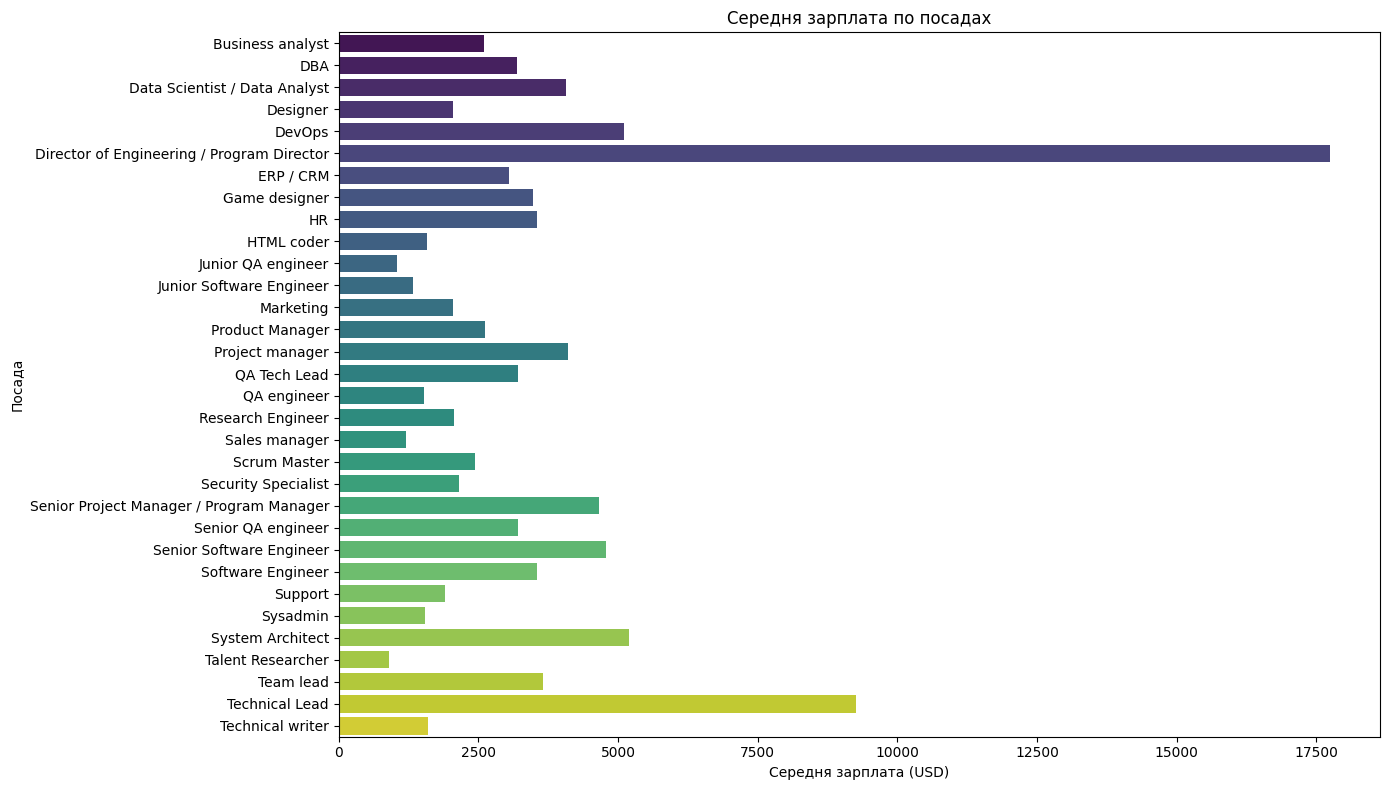

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=salary_data, x="avg", y="Посада", palette="viridis")
plt.title("Середня зарплата по посадах")
plt.xlabel("Середня зарплата (USD)")
plt.ylabel("Посада")
plt.tight_layout()
plt.show()

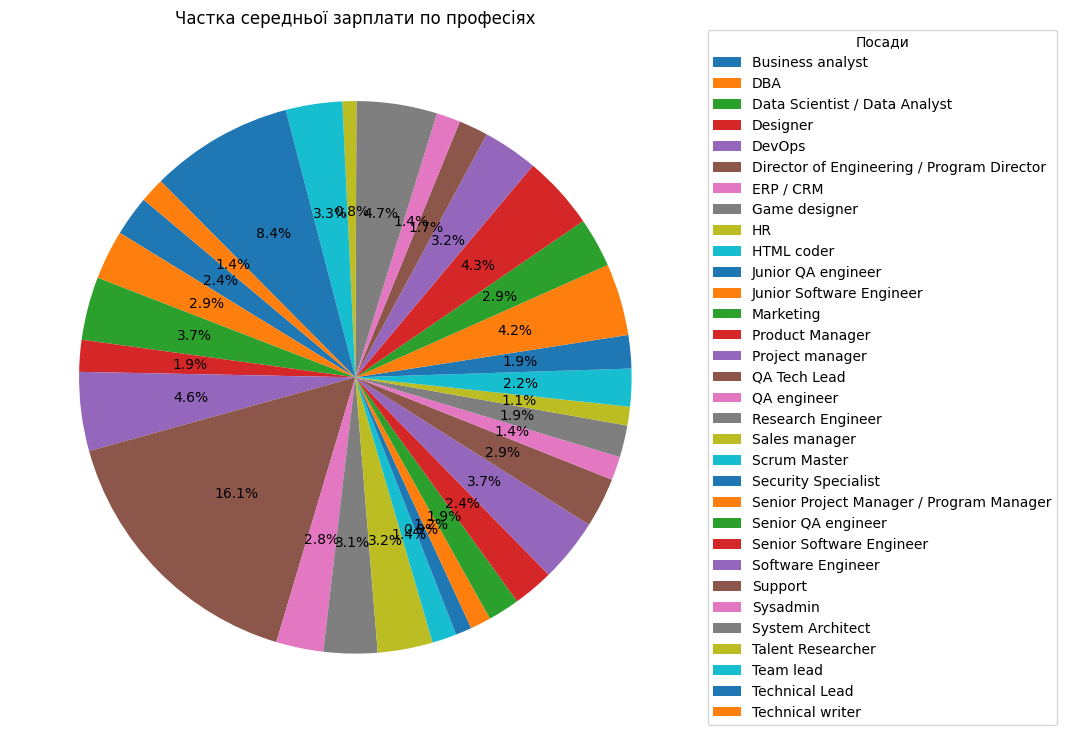

In [54]:
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(salary_data["avg"], autopct="%1.1f%%", startangle=140, labeldistance=1.2)
plt.legend(wedges, salary_data["Посада"], title="Посади", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Частка середньої зарплати по професіях")
plt.tight_layout()
plt.show()


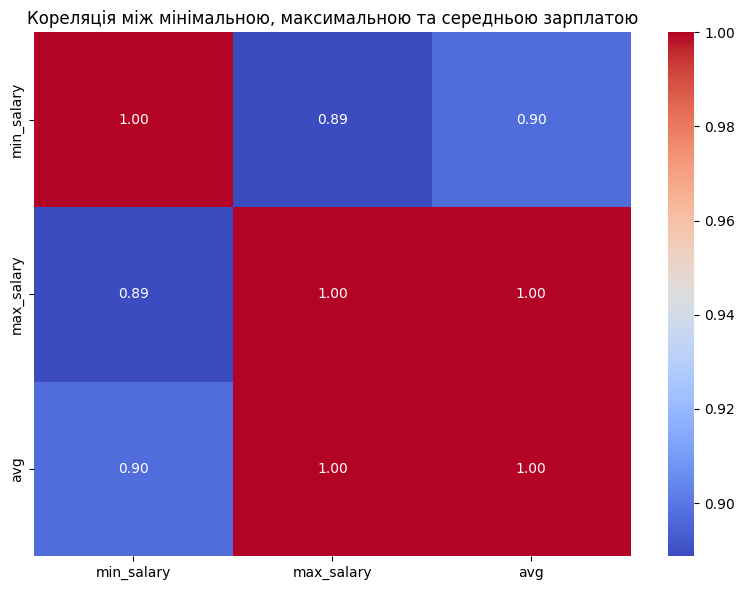

In [57]:
plt.figure(figsize=(8, 6))
correlation_data = salary_data[["min_salary", "max_salary", "avg"]].corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляція між мінімальною, максимальною та середньою зарплатою")
plt.tight_layout()
plt.show()